<a href="https://colab.research.google.com/github/sabiqsabry/diabetes_prediction/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all the dependencies

import numpy as np #to import numpy arrays
import pandas as pd #to create structured data frames
from sklearn.preprocessing import StandardScaler #to standardize our data we import
from sklearn.model_selection import train_test_split #to split our data into training and test data
from sklearn import svm #importing the model, in this case SVM which stands for Support Vector Machine
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#gathering and evaluating the data

the_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Diabetes Prediction/diabetes.csv") #loading the dataset to pandas DataFrame

In [3]:
the_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(the_dataset.shape)

(768, 9)


In [5]:
#obtaining the data's statistical measurements
print(the_dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [6]:
print(the_dataset["Outcome"].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


label 0 -> Non-Diabetic Patients

label 1 -> Diabetic Patients

In [7]:
the_dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
remove_outcome = the_dataset.drop(columns = "Outcome", axis=1)
outcome = the_dataset["Outcome"]

In [9]:
print(remove_outcome)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(outcome)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [11]:
#data standardization

scalerr = StandardScaler()
scalerr.fit(remove_outcome)
data_standard = scalerr.transform(remove_outcome)

In [12]:
print(data_standard)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [13]:
remove_outcome = data_standard

In [14]:
print(remove_outcome)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [15]:
print(outcome)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [16]:
#splitting the data

remove_outcome_train, remove_outcome_test, outcome_train, outcome_test = train_test_split(remove_outcome, outcome, test_size = 0.2, stratify=outcome, random_state=2)
print(remove_outcome.shape, remove_outcome_train.shape, remove_outcome_test.shape)

(768, 8) (614, 8) (154, 8)


In [17]:
#training the model

classify = svm.SVC(kernel="linear")

In [18]:
#training the SVM Classifier

classify.fit(remove_outcome_train, outcome_train)

SVC(kernel='linear')

In [19]:
#accuracy score for the trained data

remove_outcome_train_prediction = classify.predict(remove_outcome_train)
train_data_accuracy = accuracy_score(remove_outcome_train_prediction, outcome_train)
print("This is the Accuracy Score for Trained data: ", (train_data_accuracy * 100), "%") 
#if the accuracy is above 75% it's good but if it is not we need to use optimization techniques to increase the score

This is the Accuracy Score for Trained data:  78.66449511400651 %


In [22]:
#accuracy score for the test data

remove_outcome_test_prediction = classify.predict(remove_outcome_test)
test_data_accuracy = accuracy_score(remove_outcome_test_prediction, outcome_test)
print("This is the Accuracy Score for Test data: ", (test_data_accuracy * 100), "%") 
#if the accuracy is above 75% it's good but if it is not we need to use optimization techniques to increase the score

This is the Accuracy Score for Test data:  77.27272727272727 %


In [36]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(remove_outcome_test_prediction, outcome_test)
print(cf_matrix)

[[91 26]
 [ 9 28]]


In [37]:
tn,fp,fn,tp = cf_matrix.ravel()
print(tn, fp, fn, tp)

91 26 9 28


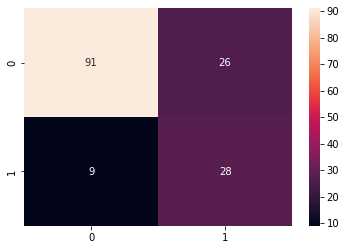

In [38]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [31]:
#here is where we predict if the person has diabetes or not

input_data = (1,89,66,29,94,26.6,0.167,31)

input_data_1 = np.asarray(input_data)
input_data_main = input_data_1.reshape(1,-1)
main_data = scalerr.transform(input_data_main)
predict_diabetes = classify.predict(main_data)
print(predict_diabetes)

if (predict_diabetes[0] == 0):
  print("Patient Status: Non Diabetic")
elif (predict_diabetes[0] == 1):
  print("Patient Status: Diabetic")

[0]
Patient Status: Non Diabetic
